# What we will see in this notebook:
1. analysis on the dataset to understand each independent variable and its relationship with the target variable
2. necessary preprocessing of data
3. Application of  algorithms and select the best among them

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import warnings  
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/content/diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Checking for null values**

In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

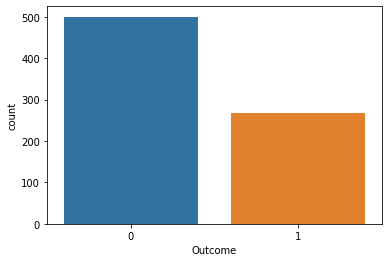

In [14]:
sns.countplot(data['Outcome'])

**In this case, we need to address the imbalancing in the target variable before using any algorithms**

# Relationship between variables

In [16]:
len(data)

768

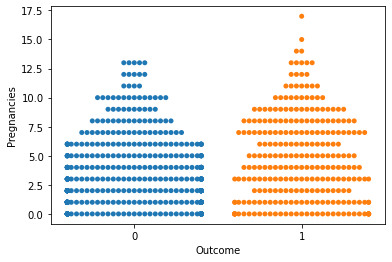

In [17]:
sns.swarmplot(x="Outcome", y="Pregnancies", data=data)

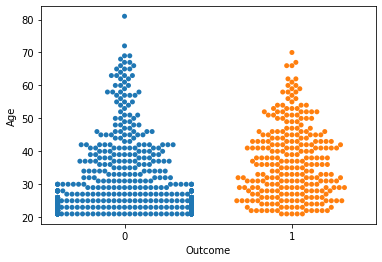

In [18]:
sns.swarmplot(x="Outcome", y="Age", data=data)

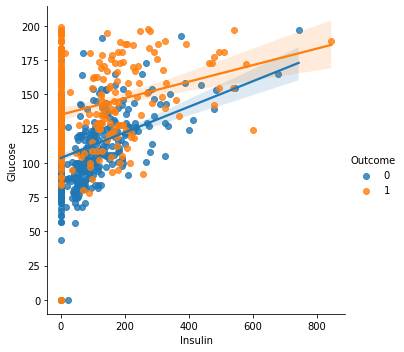

In [19]:
sns.lmplot(x='Insulin',y='Glucose', hue = 'Outcome',data = data)

**If normal levels of Insulin are maintained in blood then glucose level is also low**

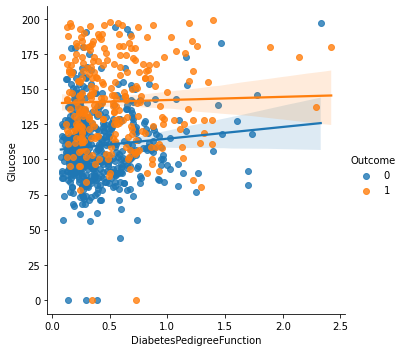

In [20]:
sns.lmplot(x='DiabetesPedigreeFunction',y='Glucose', hue = 'Outcome',data = data)

**Although not always but having a family history of diabetes might cause glucose levels to rise**

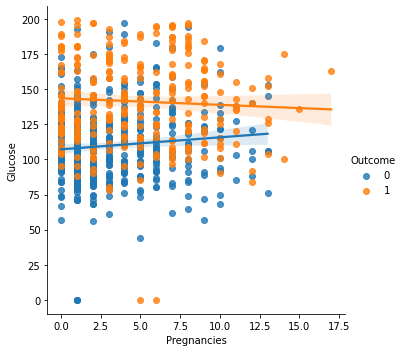

In [21]:
sns.lmplot(x='Pregnancies',y='Glucose', hue = 'Outcome',data = data)

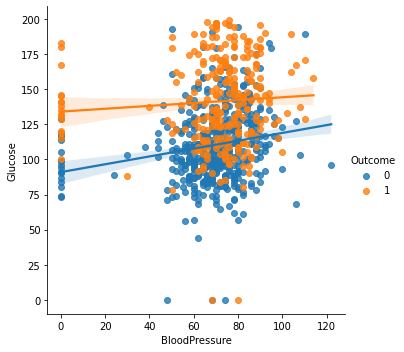

In [22]:
sns.lmplot(x='BloodPressure',y='Glucose',hue = 'Outcome',data = data)

**Long term High systolic blood pressure can increase glucose level**

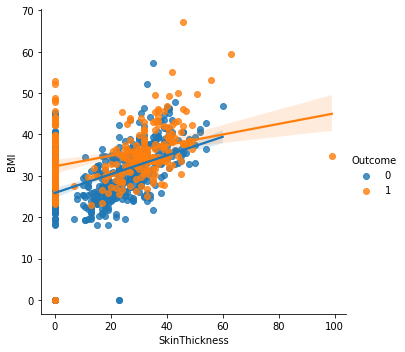

In [23]:
sns.lmplot(x='SkinThickness',y='BMI',hue = 'Outcome',data = data)

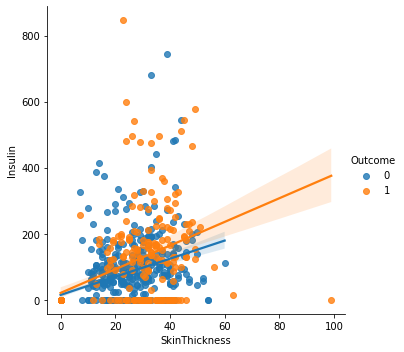

In [24]:
sns.lmplot(x='SkinThickness',y='Insulin',hue = 'Outcome',data = data)

**If insulin content is more skin thickness is more**

# What does the relationships tell us?
1. High amounts of insulin in the blood after two hours indicate elevated glucose levels, which can cause diabetes.
2. Having a family history of diabetes does not automatically increase the chance of developing it, although it can.
3. Long-term high systolic blood pressure can also cause an increase in blood glucose levels, as shown in the graph.
4. Skin thickness can raise BMI and make people more tolerant of the effects of insulin, which can reduce the impact of insulin on blood glucose levels. Since this can eventually result in diabetes, it is recommended that BMI be maintained.
5. In situations where skin thickness is greater, insulin levels rise.

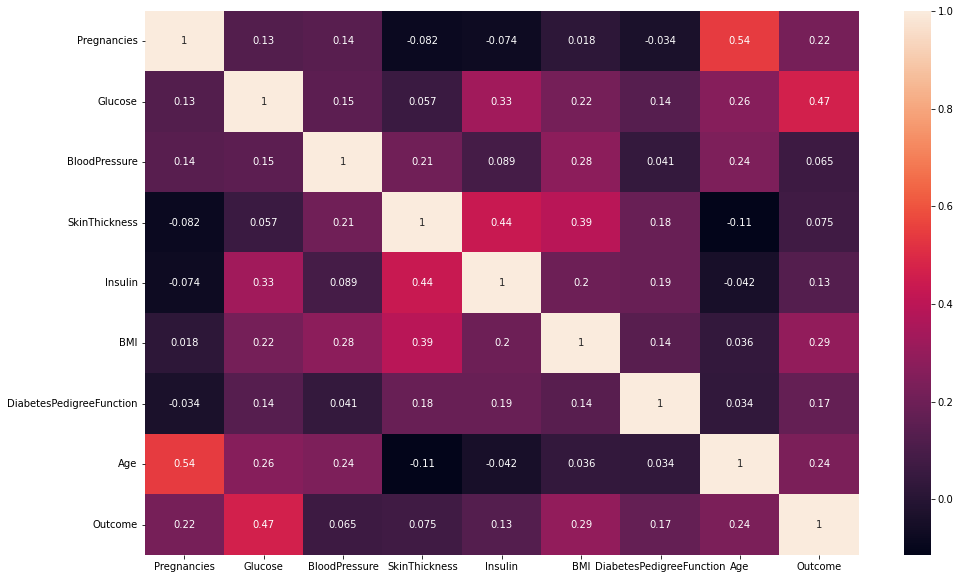

In [25]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(method='pearson'), annot=True)

# **Logistic Regression**

**Splitting into features and labels**

In [26]:
y=data['Outcome']
X=data.drop(columns=['Outcome'], inplace=True)

In [27]:
features = ['Age', 'Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction']
X=data[features]

**Splitting of data into train and test**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, shuffle=True)

**Importing the Model**

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [31]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       137
           1       0.68      0.69      0.68        55

    accuracy                           0.82       192
   macro avg       0.78      0.78      0.78       192
weighted avg       0.82      0.82      0.82       192



**In this case we got an accuracy of around 76% with precision of positive case as 72%. Let's see if we can improve it**

**Since target variable is imbalanced, Applying smote for its treatment**

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
x_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

In [33]:
X_train = x_train_smote
X_test = x_test_smote
y_train = y_train_smote
y_test = y_test_smote

**Again predicting results after treatment of imbalance**

In [34]:
pred1=log_reg.predict(X_test)
pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

In [35]:
from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 
classification_report = classification_report(y_test, pred1)
print(classification_report)

              precision    recall  f1-score   support

           0       0.73      0.87      0.79       137
           1       0.84      0.67      0.74       137

    accuracy                           0.77       274
   macro avg       0.78      0.77      0.77       274
weighted avg       0.78      0.77      0.77       274



**Despite having slightly lower accuracy than the baseline model, precision has greatly increased. Accuracy becomes less crucial in this type of dataset where we need to be more exact about the early detection of positive cases. Therefore, it is important for us to comprehend why we are developing models**

In [36]:
cm = confusion_matrix(y_test, pred1)
cm

array([[119,  18],
       [ 45,  92]])

In [37]:
tn = cm[0,0]
fp = cm[0,1]
tp = cm[1,1]
fn = cm[1,0]
accuracy  = (tp + tn) / (tp + fp + tn + fn)
precision = tp / (tp + fp)
recall    = tp / (tp + fn)
f1score  = 2 * precision * recall / (precision + recall)
print(f1score)

0.7449392712550607


**ROC curve**

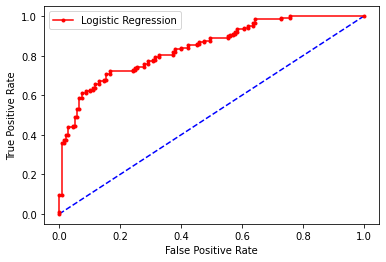

In [38]:
predicted_probab = log_reg.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab)
from matplotlib import pyplot
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
pyplot.plot(fpr, tpr, marker='.', color='red', label='Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
